# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
telecom_train_df = pd.read_csv('train (1).csv')
telecom_test_df = pd.read_csv('test (1).csv')
telecom_test_sol_df = pd.read_csv('solution (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [6]:
telecom_train_df.shape

(69999, 172)

In [7]:
telecom_test_df.shape

(30000, 171)

In [8]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [9]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [12]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [13]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [14]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [15]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [16]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [17]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [18]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [19]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [20]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [21]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [22]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [23]:
telecom_train_df.shape

(69999, 144)

In [24]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [25]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [26]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [27]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [28]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [29]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [30]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [31]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [32]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [33]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [34]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [35]:
telecom_train_df.shape

(21013, 141)

## Lets visualize the 8th month and average_amnt_6_7 months data to check behavior pattern of customers

In [36]:
# Look it later
#plt.scatter(telecom_train_df[['average_amnt_6_7', 'total_recharge_amnt_8']])
#plt.show()
#sns.
#telecom_train_df.plot.scatter(x='average_amnt_6_7', y='total_recharge_amnt_8')
#telecom_train_df.DataFrame(np.random.rand(10, 3), columns =['average_amnt_6_7', 'total_recharge_amnt_8'])

#telecom_train_df.plot.bar(x="average_amnt_6_7", y="total_recharge_amnt_8", rot=70);

#ig, ax = plt.subplots()

#ax.plot(telecom_train_df['average_amnt_6_7'], telecom_train_df['total_recharge_amnt_8'])
#plt.show()

## Lets focus on Outliers now and treat them

In [39]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [40]:
#telecom_train_df = remove_outliers(telecom_train_df, telecom_train_df.columns)
#telecom_test_df = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [41]:
telecom_train_df.shape

(21013, 141)

In [42]:
telecom_test_df.shape

(30000, 140)

## Let's check for Data imbalance here

In [43]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [44]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [45]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [46]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [47]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [48]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.000000,0.002051,0.000000,0.000000,0.000000,0.000000,0.000000,0.096264,0.000000,0.069171
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003787,0.009557,0.009933,0.016496,0.002008
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008632,0.019367,0.017273,0.009450
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.029661,0.043865,0.039021,0.000000,0.011038,0.011124,0.015034,0.032992,0.023503,0.026840
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.098218,0.000000,0.000000,0.043938,0.000000,0.016759,0.045971,0.006063,0.026593,0.029892


In [49]:
from imblearn.over_sampling import SMOTE ## Comments to be fixed 

In [50]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [51]:
X_resampled.shape

(27020, 140)

In [52]:
sum(y_resampled)/len(y_resampled) * 100

50.0

## Now there is no data imbalance.

In [53]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_recharge_amnt_6,total_data_recharge_amnt_7,total_data_recharge_amnt_8,total_recharge_amnt_6,total_recharge_amnt_7,total_recharge_amnt_8,average_amnt_6_7
0,0.132455,0.074824,0.049909,0.004308,0.002480,0.002149,0.007194,0.004771,0.002487,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.001868,0.001605,0.001013,-0.011863
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.009067,0.008917,0.008442,0.000701
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.040694,0.082745,0.0319,0.0,0.0,0.0,0.009067,0.017833,0.016884,0.008485
3,0.129731,0.080680,0.047931,0.000720,0.000265,0.000000,0.004788,0.030417,0.001714,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.001995,0.004637,0.000000,-0.009108
4,0.144568,0.093651,0.067145,0.061129,0.074656,0.065164,0.007287,0.003537,0.005294,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.006456,0.008738,0.009219,-0.001697


## Modelling 

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
    - Lasso
    - Ridge
3. Tree models
    - XGBoost
    - Random Forest

## 1. Logistic Regression using RFE - To get importnat predictors for Churn probability

In [54]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26886
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8666.9
Date:                Fri, 16 Sep 2022   Deviance:                       17334.
Time:                        16:53:05   Pearson chi2:                 1.67e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.1563      0.671     -6.195      0.000      -5.471      -2.841
arpu_6                         9.3046      3.643      2.554      0.011       2.164      16.445
arpu_7                        22.2671      4.322      5.152      0.000      13.797      30.738
arpu_8                        41.4633      4.894      8.473      0.000      31.872      51.055
onnet_mou_6                  -94.9922     36.354     -2.613      0.009    -166.245     -23.739
onnet_mou_7                  -30.1004     31.630     -0.952      0.341     -92.094      31.893
onnet_mou_8                  -29.4465     48.746     -0.604      0.546    -124.986      66.093
offnet_mou_6                 -93.2778     40.890     -2.281      0.023    -173.421     -13.135
offnet_mou_7                 -32.1587     25.287     -1.272      0.203     -81.721      17.403
offnet_mou_8                 -83.8900     62.079     -1.351      0.177    -205.563      37.783
roam_ic_mou_6                  1.8720      1.126      1.662      0.096      -0.335       4.079
roam_ic_mou_7                  1.2856      1.315      0.978      0.328      -1.292       3.863
roam_ic_mou_8                 -2.3561      1.368     -1.722      0.085      -5.038       0.326
roam_og_mou_6                 46.4365     18.592      2.498      0.013       9.996      82.877
roam_og_mou_7                 16.3342     10.683      1.529      0.126      -4.604      37.273
roam_og_mou_8                 30.2828     23.925      1.266      0.206     -16.609      77.174
loc_og_t2t_mou_6           -4.165e+04   2.54e+04     -1.643      0.100   -9.13e+04    8036.676
loc_og_t2t_mou_7            2.794e+04   2.86e+04      0.976      0.329   -2.82e+04    8.41e+04
loc_og_t2t_mou_8            1.633e+05   4.39e+04      3.718      0.000    7.72e+04    2.49e+05
loc_og_t2m_mou_6           -3.043e+04   1.85e+04     -1.644      0.100   -6.67e+04    5858.066
loc_og_t2m_mou_7            1.721e+04   1.76e+04      0.976      0.329   -1.74e+04    5.18e+04
loc_og_t2m_mou_8            7.539e+04   2.03e+04      3.719      0.000    3.57e+04    1.15e+05
loc_og_t2f_mou_6           -4005.8635   2434.652     -1.645      0.100   -8777.693     765.966
loc_og_t2f_mou_7            3077.8287   3155.241      0.975      0.329   -3106.330    9261.987
loc_og_t2f_mou_8            8942.3650   2403.938      3.720      0.000    4230.734    1.37e+04
loc_og_t2c_mou_6              -9.0443      1.563     -5.788      0.000     -12.107      -5.982
loc_og_t2c_mou_7              -3.7948      2.560     -1.482      0.138      -8.813       1.223
loc_og_t2c_mou_8               8.2316      1.571      5.239      0.000       5.152      11.311
loc_og_mou_6                4.797e+04   4.75e+04      1.010      0.313   -4.51e+04    1.41e+05
loc_og_mou_7               -3.222e+04   3.5

## Lower the p-value higher the significance

In [55]:
logreg = LogisticRegression()

In [56]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [57]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,

In [58]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 16),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 48),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 52),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 39),
 ('loc_og_t2t_mou_7', False, 40),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 8),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 45),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 2),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 69),
 ('loc_og_mou_7', False, 32),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 46),
 ('std_og_t2t_mou_7', False, 7),
 ('std_og_t2t_mou_8', False, 61),
 ('st

In [59]:
col = X_resampled.columns[rfe.support_]

In [60]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8968.7
Date:                Fri, 16 Sep 2022   Deviance:                       17937.
Time:                        16:53:36   Pearson chi2:                 4.20e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.1695      0.510     -4.252      0.000      -3.170      -1.170
arpu_6                         4.4275      3.271      1.354      0.176      -1.983      10.839
arpu_7                         6.5234      2.381      2.739      0.006       1.856      11.191
arpu_8                        35.8779      4.483      8.004      0.000      27.092      44.664
onnet_mou_7                    7.0257      1.435      4.895      0.000       4.213       9.839
offnet_mou_7                   5.9937      1.149      5.215      0.000       3.741       8.246
offnet_mou_8                 -48.0938     10.161     -4.733      0.000     -68.008     -28.180
roam_ic_mou_6                  2.0810      0.969      2.149      0.032       0.183       3.979
roam_og_mou_6                  0.9129      0.934      0.978      0.328      -0.917       2.743
roam_og_mou_7                  1.6967      0.832      2.038      0.042       0.065       3.328
roam_og_mou_8                 17.4105      3.041      5.724      0.000      11.449      23.371
loc_og_t2t_mou_8            6335.0785   3.81e+04      0.166      0.868   -6.83e+04     8.1e+04
loc_og_t2m_mou_6              -3.4334      0.897     -3.828      0.000      -5.191      -1.676
loc_og_t2m_mou_8            2941.4514   1.76e+04      0.167      0.867   -3.15e+04    3.74e+04
loc_og_t2f_mou_6              -3.7701      1.571     -2.400      0.016      -6.849      -0.691
loc_og_t2f_mou_8             350.6618   2084.690      0.168      0.866   -3735.255    4436.579
loc_og_t2c_mou_6              -8.0190      1.292     -6.205      0.000     -10.552      -5.486
loc_og_t2c_mou_8               6.0369      1.360      4.440      0.000       3.372       8.702
loc_og_mou_8               -6485.8845   3.91e+04     -0.166      0.868   -8.32e+04    7.02e+04
std_og_t2m_mou_8              41.8002     10.181      4.106      0.000      21.846      61.754
std_og_t2f_mou_8              -6.9396      1.890     -3.672      0.000     -10.644      -3.235
std_og_mou_6                   1.5788      0.564      2.801      0.005       0.474       2.683
std_og_mou_7                  -3.2248      1.416     -2.277      0.023      -6.001      -0.449
std_og_mou_8                  44.8158     33.523      1.337      0.181     -20.888     110.520
spl_og_mou_8                  -0.5277      2.422     -0.218      0.828      -5.275       4.219
total_og_mou_8               -54.0984     33.871     -1.597      0.110    -120.485      12.288
loc_ic_t2t_mou_6              11.4081      5.312      2.148      0.032       0.997      21.819
loc_ic_t2t_mou_8            1516.7155   8905.301      0.170      0.865   -1.59e+04     1.9e+04
loc_ic_t2m_mou_6              12.9114      5.300      2.436      0.015       2.523      23.300
loc_ic_t2m_mou_8            1777.9811   1.0

### Making predictions on the test set

In [61]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   arpu_6                      6304 non-null   float64
 1   arpu_7                      6304 non-null   float64
 2   arpu_8                      6304 non-null   float64
 3   onnet_mou_7                 6304 non-null   float64
 4   offnet_mou_7                6304 non-null   float64
 5   offnet_mou_8                6304 non-null   float64
 6   roam_ic_mou_6               6304 non-null   float64
 7   roam_og_mou_6               6304 non-null   float64
 8   roam_og_mou_7               6304 non-null   float64
 9   roam_og_mou_8               6304 non-null   float64
 10  loc_og_t2t_mou_8            6304 non-null   float64
 11  loc_og_t2m_mou_6            6304 non-null   float64
 12  loc_og_t2m_mou_8            6304 non-null   float64
 13  loc_og_t2f_mou_6            6

In [62]:
X_test_sm = sm.add_constant(X_test)

In [63]:
y_test_pred = res.predict(X_test_sm)

In [64]:
y_test_pred[:10]

5662     0.0
37574    1.0
58341    0.0
23282    0.0
30561    1.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [65]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_7,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_og_mou_6,roam_og_mou_7,...,vol_3g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,total_data_recharge_amnt_8
5662,1.0,554.740,782.352,673.692,38.63,845.83,661.89,0.0,0.0,0.00,...,0.0,0,0,0,0,0,0,0.00,0.0,0.0
37574,1.0,1563.157,1579.675,1256.565,3158.18,1144.44,1327.03,0.0,0.0,0.00,...,0.0,0,0,0,0,0,0,0.00,0.0,0.0
58341,1.0,594.217,796.737,996.393,1200.53,186.48,585.36,0.0,0.0,0.00,...,0.0,0,0,0,0,0,0,0.00,0.0,0.0
23282,1.0,352.160,197.245,365.564,179.88,116.58,507.64,0.0,0.0,34.96,...,0.0,0,0,3,0,0,0,0.00,0.0,207.0
30561,1.0,332.040,275.976,267.033,96.89,178.24,424.68,0.0,0.0,0.00,...,0.0,0,0,0,0,0,0,31.05,337.7,0.0


In [66]:
X_resampled_sm.shape

(27020, 71)

In [67]:
y_pred_train = res.predict(X_resampled_sm)

In [68]:
y_pred_train.head()

0    0.998070
1    0.069801
2    0.102982
3    0.041977
4    0.002893
dtype: float64

In [69]:
y_pred_train.shape

(27020,)

## Confusion matrix for Precision and Recall and Accuracy of the model

In [70]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [71]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [72]:
y_pred_train_final.head()

,Churn_Prob
0,0.998070
1,0.069801
2,0.102982
3,0.041977
4,0.002893


In [73]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [74]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11695,  1815],
       [ 1657, 11853]])

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [76]:
# Metrics dict
metrics_dict = {}

In [111]:
def get_accuracy_params(y_actual, y_pred, y_proba, model):
    # Print ROC curve
    auc_score = draw_roc(y_actual, y_proba)
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    print('AUC score: ', auc_score)
    metrics_dict[model] = [accuracy, precision, recall, f1_score, auc_score]
    return metrics_dict

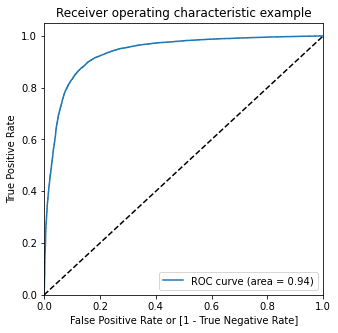

confusion matrix: 
[[11695  1815]
 [ 1657 11853]]
Accuracy:  0.8715025906735752
Precision:  0.867208077260755
Recall:  0.8773501110288675
F1_score:  0.8722496136581057
AUC score:  0.9355562702409214


In [112]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

In [113]:
metrics_dict

{'Logistic_rfe_train': [0.8715025906735752,
  0.867208077260755,
  0.8773501110288675,
  0.8722496136581057,
  0.9355562702409214],
 'Logistic_rfe_test': [2.071447219563136,
  0.3139231499051233,
  0.8653154625694671,
  0.46070838047167345,
  0.9019305549925005]}

## With Logistic regression with RFE we get (on train dataset)

- TBD

### Let's check for test data set

In [114]:
telecom_test_df.shape

(30000, 71)

In [115]:
telecom_test_sol_df.shape

(30000, 2)

In [116]:
# Lets do prediction on telecom_test_df dataset

In [117]:
telecom_test_df = telecom_test_df[col]
telecom_test_df = sm.add_constant(telecom_test_df)

In [118]:
y_pred_test = res.predict(telecom_test_df)

In [119]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [120]:
y_pred_test_final.head()

,Churn_Prob
0,0.094367
1,0.356265
2,0.775432
3,0.138565
4,0.278149


In [121]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

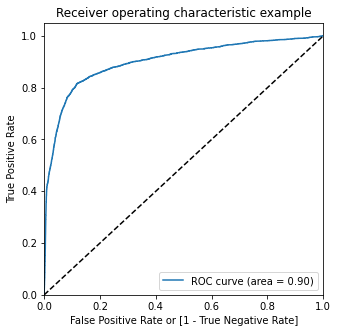

confusion matrix: 
[[21156  5785]
 [  412  2647]]
Accuracy:  0.7934333333333333
Precision:  0.3139231499051233
Recall:  0.8653154625694671
F1_score:  0.46070838047167345
AUC score:  0.9019305549925005


In [123]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

In [124]:
metrics_dict

{'Logistic_rfe_train': [0.8715025906735752,
  0.867208077260755,
  0.8773501110288675,
  0.8722496136581057,
  0.9355562702409214],
 'Logistic_rfe_test': [0.7934333333333333,
  0.3139231499051233,
  0.8653154625694671,
  0.46070838047167345,
  0.9019305549925005]}

### This seems a good model but lets compare with other models.

## PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [89]:
# Looking at the data again

In [90]:
y_resampled.shape

(27020,)

In [91]:
X_resampled.shape

(27020, 140)

In [92]:
pca = PCA(random_state=42)

In [93]:
pca.fit(X_resampled)

PCA(random_state=42)

In [94]:
pca.components_

array([[ 1.63445615e-02,  1.21445913e-02, -6.45977539e-03, ...,
        -2.99320846e-03, -9.49161344e-03, -3.43282963e-03],
       [ 5.01240264e-02,  5.50685934e-02,  3.70930243e-02, ...,
        -4.12763987e-03, -2.58412771e-03, -1.17683039e-02],
       [ 5.08915824e-02,  7.50298961e-02,  7.00117568e-02, ...,
         6.11154020e-02,  5.89548967e-02,  9.08199234e-02],
       ...,
       [-0.00000000e+00,  6.32102469e-17, -9.36256115e-18, ...,
        -1.25696599e-02, -2.21738962e-03,  1.64973250e-01],
       [-0.00000000e+00,  1.50210072e-16, -2.68909494e-16, ...,
         3.91019007e-01, -5.58786857e-01,  3.37852169e-02],
       [ 0.00000000e+00,  2.04338269e-16, -1.22904430e-16, ...,
        -6.57414532e-01, -3.64471770e-01,  3.42370364e-01]])

In [95]:
pca.explained_variance_ratio_

array([1.90312958e-01, 1.54832442e-01, 7.45684670e-02, 5.94630858e-02,
       5.51443461e-02, 5.02698063e-02, 4.47075525e-02, 3.29385129e-02,
       2.13523236e-02, 2.01400908e-02, 1.92663981e-02, 1.82048117e-02,
       1.54345151e-02, 1.30397595e-02, 1.22207357e-02, 1.19102896e-02,
       1.08083037e-02, 1.04122790e-02, 1.02585920e-02, 9.99690359e-03,
       8.97993317e-03, 8.21838698e-03, 7.88611067e-03, 7.21618626e-03,
       6.92845693e-03, 6.60826736e-03, 6.25375195e-03, 5.66728006e-03,
       5.36219900e-03, 5.14102844e-03, 4.93110461e-03, 4.61920278e-03,
       4.20047514e-03, 3.55144947e-03, 3.48613118e-03, 3.27940152e-03,
       3.16876382e-03, 2.95803830e-03, 2.92878311e-03, 2.88778214e-03,
       2.71567206e-03, 2.62781590e-03, 2.55748332e-03, 2.48589397e-03,
       2.35763653e-03, 2.27368600e-03, 2.16118043e-03, 2.09292254e-03,
       2.00043053e-03, 1.85408655e-03, 1.81895297e-03, 1.75857954e-03,
       1.72932315e-03, 1.65409695e-03, 1.57201361e-03, 1.48149124e-03,
      

In [96]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

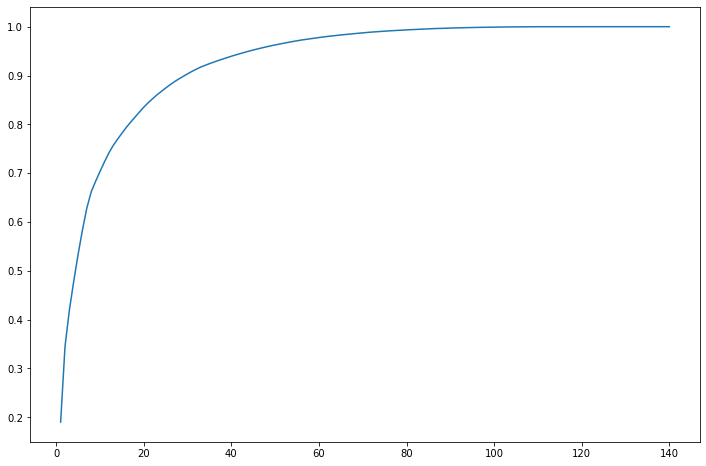

In [97]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [98]:
pca_final = IncrementalPCA(n_components=50)

In [99]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [100]:
df_train_pca.shape

(27020, 50)

In [101]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [102]:
corrmat.shape

(50, 50)

In [103]:
corrmat

array([[ 1.00000000e+00, -2.64701613e-07,  2.89977454e-07, ...,
        -1.73287055e-05,  7.03413141e-06,  6.97310631e-06],
       [-2.64701613e-07,  1.00000000e+00, -2.80697098e-07, ...,
        -7.72381254e-05,  2.32277203e-05,  1.15500604e-05],
       [ 2.89977454e-07, -2.80697098e-07,  1.00000000e+00, ...,
         3.12575640e-05,  4.54244005e-05,  8.75861396e-05],
       ...,
       [-1.73287055e-05, -7.72381254e-05,  3.12575640e-05, ...,
         1.00000000e+00, -4.93114743e-02, -3.64587185e-02],
       [ 7.03413141e-06,  2.32277203e-05,  4.54244005e-05, ...,
        -4.93114743e-02,  1.00000000e+00,  3.61322680e-02],
       [ 6.97310631e-06,  1.15500604e-05,  8.75861396e-05, ...,
        -3.64587185e-02,  3.61322680e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [104]:
X_test.shape

(6304, 70)

In [105]:
df_test_pca = pca_final.transform(X_test_ori)
df_test_pca.shape

(6304, 50)

## Applying logistic regression on the data on our Principal components

In [106]:
learner_pca = LogisticRegression()

In [107]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

### Making predictions on the test set

In [108]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [109]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.79'

##### So we could see the accuracy coming close to 80%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

In [110]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final, 'Logistic_pca')

TypeError: get_accuracy_params() missing 1 required positional argument: 'model'

### Ridge and Lasso Regression


#### Ridge Regression

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging we will go ahead with Lasso.

In [ ]:
# Lets do prediction for test data and train data
# train data

In [ ]:
y_train_pred = ridge.predict(X_resampled)
metrics.r2_score(y_true=y_resampled, y_pred=y_train_pred)

In [ ]:
# Prediction for test data 
y_pred_test = ridge.predict(X_resampled)

In [ ]:
y_pred_test